 Samples: 400 
 Features: 4096 
 Height: 64 
 Width: 64 
 Classes: 40


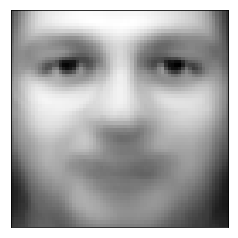

features: [[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]] 
 target_values: [ 0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  2  2  2  2
  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4
  4  4  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  7  7
  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9
  9  9  9  9 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 14 14 14 14
 14 14 14 14 14 14 15 15 15 15 15 15 15 15 15 15 16 16 16 16 16 16 16 16
 16 16 17 17 17 17

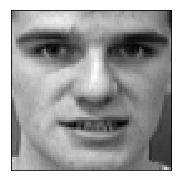

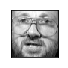

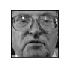

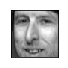

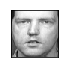

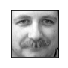

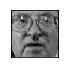

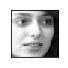

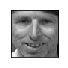

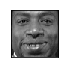

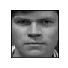

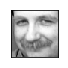

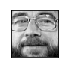

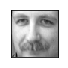

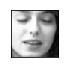

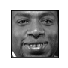

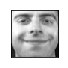

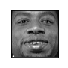

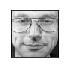

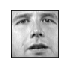

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


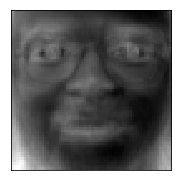

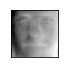

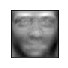

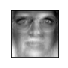

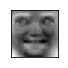

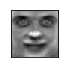

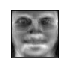

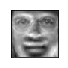

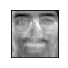

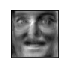

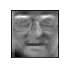

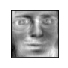

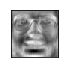

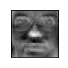

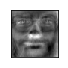

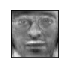

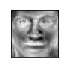

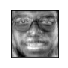

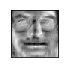

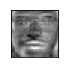

[[ 1.007922   -0.36750042 -0.58516747 ... -0.21618792  0.45782346
  -0.8704207 ]
 [-0.04312423 -0.23411414  0.73023844 ... -0.73601955 -0.39650768
  -1.0810704 ]
 [ 1.7565277  -0.13355578 -1.4732994  ... -1.6322994   0.50981355
  -2.4778104 ]
 ...
 [-0.967508   -1.3423288  -1.0408914  ...  1.199014    0.50987756
   0.3464933 ]
 [-1.2836171   0.3299523  -0.6806148  ... -0.42562488  0.58138645
   0.59112674]
 [ 0.25648022  0.22224122  0.30244458 ... -0.42009604 -0.2599644
   0.5962101 ]]
Accuracy 0.35833333333333334
             precision    recall  f1-score   support

          0       1.00      0.50      0.67         2
          1       0.00      0.00      0.00         5
          2       1.00      0.25      0.40         4
          3       0.00      0.00      0.00         4
          4       1.00      0.75      0.86         4
          5       1.00      0.25      0.40         4
          6       0.00      0.00      0.00         2
          7       1.00      0.50      0.67         2
  

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


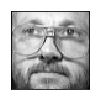

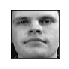

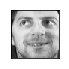

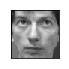

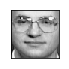

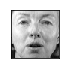

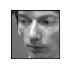

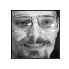

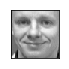

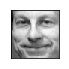

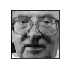

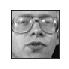

In [22]:
# In this whole procedure of face detection images we will use the concept of KNN classifier,confusion_matrix,classification_matrix principle componenet analysis

import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import RandomizedPCA
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import classification_report,confusion_matrix
def main():
    data2=fetch_olivetti_faces()
    x=data2.data
    y=data2.target
    n_samples,height,width=data2.images.shape
    n_features=x.shape[1]
    n_classes=int(max(y)+1)
    print(' Samples:',n_samples,'\n Features:',n_features,'\n Height:',height,'\n Width:',width,'\n Classes:',n_classes)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=60)
    n_components=150
    mean_image=np.mean(x_train,axis=0)
    plt.figure # Here we are initializing figure attribute and then use 'imshow' attribute to show the mean_image and reshape into 64*64 pixels
    plt.imshow(mean_image.reshape((64,64)))# For color image
    plt.imshow(mean_image.reshape((64,64)),cmap=plt.cm.gray) # For grayish image
    plt.xticks(())
    plt.yticks(())
    plt.show()
    print('features:',x,'\n target_values:',y)
    def plot_gallery(images,h,w,titles=None,n_rows=4,n_cols=5):
        # Here height is 3.9*n_rowsand width is 2.5*n_cols
        # for attribute figure there are defined variables like height and width that's why we have used this in calling function plot_gallery
        plt.figure(figsize=(3.9*n_rows,2.5*n_cols))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
        for i in range(n_rows*n_cols):
            plt.subplot(n_rows,n_cols,i+1)
            plt.imshow(images[i].reshape((h,w)),cmap=plt.cm.gray)
            if titles != None:
                plt.title(titles[i], size=12)
            plt.xticks(())
            plt.yticks(())
            plt.show()
    chosen_images=x_train[:25]
    variables=y_train[:25]
    plot_gallery(chosen_images,height,width,titles=None)
    
    # Now here we are using PCA to plot the eigen faces which is actually a eigen vector which shows a direction where variance is maximum
    
    n_components=160
    pca=RandomizedPCA(n_components=n_components,whiten=True).fit(x_train)
    eigen_faces=pca.components_.reshape((n_components,height,width))
    plot_gallery(eigen_faces,height,width)
    
    
    # Here we are transforming 2D training features and test features into 1D respectively with the help of transform function
    x_train_pca=pca.transform(x_train)
    x_test_pca=pca.transform(x_test)
    print(x_train_pca)
    
    # Now we are using KNN classifier to detect test set faces
    knn=KNeighborsClassifier(n_neighbors=6)
    knn.fit(x_train_pca,y_train)
    y_pred_test=knn.predict(x_test_pca)
    amount=0.0
    # Now we are going to find the accuracy for how many predicted faces is same as true faces
    for i in range(len(y_test)):
        if y_pred_test[i]==y_test[i]:
            amount+=1.0
    accuracy=(amount)/(len(y_test))
    print("Accuracy",accuracy)
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test,labels=range(n_classes)))
    
    # Here we are ploting the images for x_test features and try to 
    def title(y_pred, y_test, target_names, i):
        pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
        true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
        return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
    target_names = [str(element) for element in np.arange(40)+1]
    prediction_titles = [title(y_pred_test, y_test, target_names, i)
                         for i in range(y_pred_test.shape[0])]
    plot_gallery(x_test, height, width, prediction_titles, n_rows=2, n_cols=6)
    plt.show()
        
    
    
    
    
if __name__=='__main__':
    main()
    
    
'''
Algorithm:  1. First we plot the mean image of 64*64 as we have total 4096 number of features.
            2. Then we plot some training images with the help of user_defined function plot_gallery.
            3. Then we calculate the eigen vectors(or eigen images) and plot them with the help of PCA(Principle Component Analysis)
            4. Then we transform 2D training and test features into 1D respectively.
            5. Then we caluclate the accuracy by calculating y_pred_test and y_test.
            6. And finally we plot the images with its predicted and true value of training variable.



'''    

    
    